In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib .pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
# from wordcloud import WordCloud,STOPWORDS

import re

import warnings

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KOU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
business = pd.read_csv('data/burgers_business.csv')
business.columns
business = business[business.is_open==1].reset_index(drop=True)

In [3]:
business_atr = business[['stars','review_count','attributes','categories','hours']]
business_loc = business[['stars','state','city','postal_code','review_count']]

In [4]:
business_atr[['stars','review_count']].describe()

,stars,review_count
count,1143.000000,1143.000000
mean,2.896763,46.975503
std,0.978006,93.748954
min,1.000000,3.000000
25%,2.000000,8.000000
50%,3.000000,18.000000
75%,3.500000,49.000000
max,5.000000,1879.000000


# Characteristcs of high rated restaurant

## This part of analysis will show what food catagories high rated restaurants sell (sandwiches, ice-creams, etc.)

In [5]:
business_atr['categories'] = business_atr['categories'].apply(lambda x:x.split(','))

C:\Users\KOU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


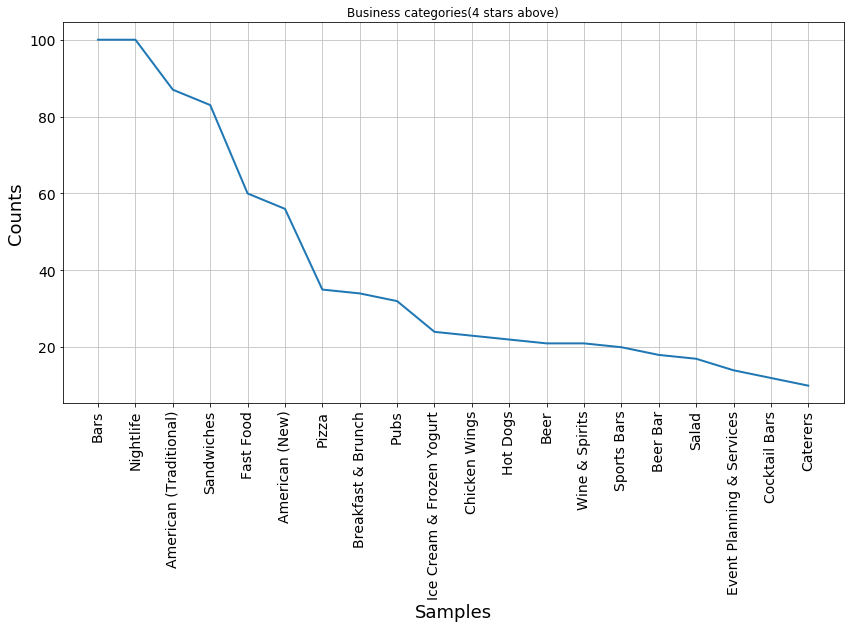

In [6]:
business_4stars = business_atr[business_atr.stars >= 4].reset_index(drop=True)
word_split = []
for i in range(len(business_4stars)):
    for word in business_4stars.categories[i]:
        word = word.strip()
        if word not in ['Restaurants','Burgers','Food']:
            word_split.append(word)
        
plt.figure(figsize=(14, 7))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Counts', fontsize=18)
FreqDist(word_split).plot(20,cumulative=False,title='Business categories(4 stars above)')

In [7]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color ='black',
    stopwords = STOPWORDS).generate(str(word_split))

fig = plt.figure(facecolor='k',edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

NameError: name 'WordCloud' is not defined

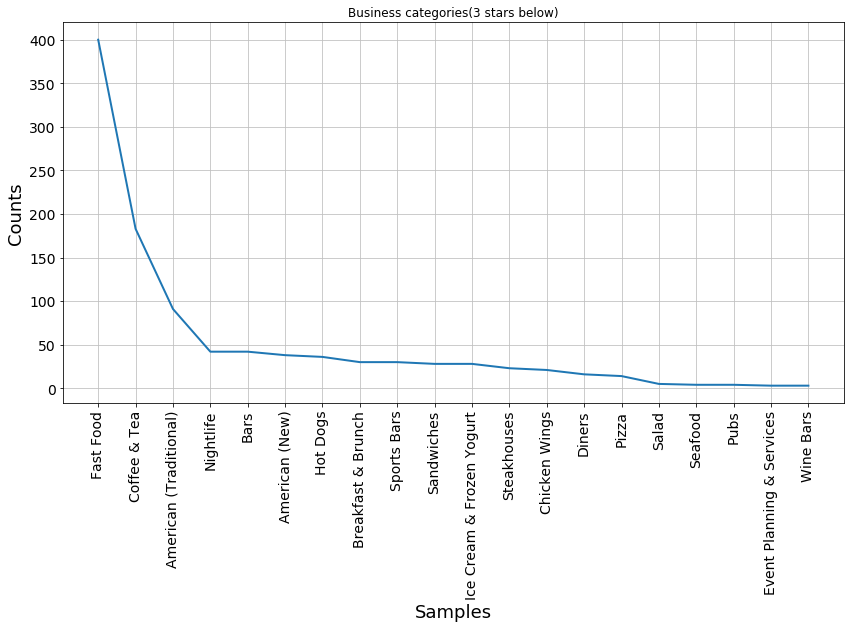

In [8]:
business_3stars = business_atr[business_atr.stars < 3].reset_index(drop=True)
word_split = []
for i in range(len(business_3stars)):
    for word in business_3stars.categories[i]:
        word = word.strip()
        if word not in ['Restaurants','Burgers','Food']:
            word_split.append(word)
        
plt.figure(figsize=(14, 7))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Counts', fontsize=18)
FreqDist(word_split).plot(20,cumulative=False,title='Business categories(3 stars below)')

In [9]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color ='black',
    stopwords = STOPWORDS).generate(str(word_split))

fig = plt.figure(facecolor='k',edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

NameError: name 'WordCloud' is not defined

# Restaruant opening hours and stars

In [10]:
def get_open(hours):
    mh = eval(hours)
    mh = list(mh.items())[0][1]
    return int(re.findall(r"^(.+?):",mh)[0])

def get_days(hours):
    return len(eval(hours).keys())

def get_close(hours):
    mh = eval(hours)
    mh = list(mh.items())[0][1]
    mh = int(re.findall(r"-(.+?):",mh)[0])
    if mh < 13:
        mh+=24
    
    return mh

In [11]:
business_atr_dropna = business_atr.dropna(axis=0,how='any')

In [12]:
business_atr_dropna['open'] = business_atr_dropna.hours.map(get_open)
business_atr_dropna['days'] = business_atr_dropna.hours.map(get_days)
business_atr_dropna['close'] = business_atr_dropna.hours.map(get_close)

C:\Users\KOU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KOU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\KOU\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [13]:
business_atr_dropna[['stars','open','days','close','review_count']].describe()

,stars,open,days,close,review_count
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,2.922812,7.406096,6.891839,23.137660,51.455261
std,0.976692,4.507789,0.437088,2.122881,98.384471
min,1.000000,0.000000,1.000000,13.000000,3.000000
25%,2.000000,5.000000,7.000000,22.000000,9.000000
50%,3.000000,10.000000,7.000000,23.000000,21.000000
75%,3.500000,11.000000,7.000000,24.000000,53.000000
max,5.000000,18.000000,7.000000,36.000000,1879.000000


Text(0.5, 1, 'Heatmap of Variables')

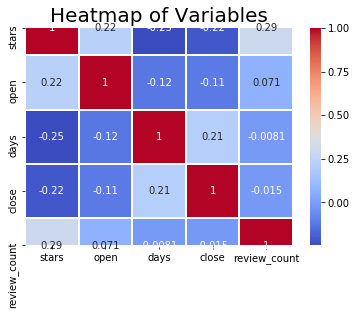

In [14]:
hours_cor = business_atr_dropna[['stars','open','days','close','review_count']].corr()
fig = plt.figure()
axes=sns.heatmap(hours_cor,cmap = 'coolwarm',linewidth=1,linecolor='white',annot=True)
axes.set_title('Heatmap of Variables',fontsize=20)

# Restaruant locations and stars

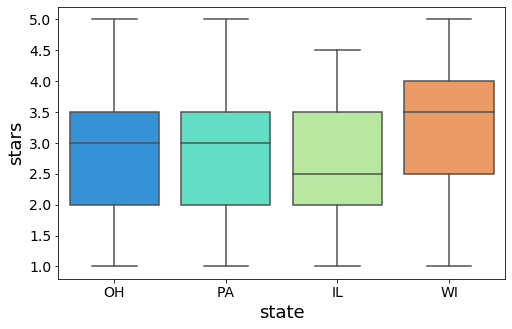

In [15]:
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Counts', fontsize=18)
sns.boxplot(x='state',y='stars',data=business_loc,palette='rainbow')

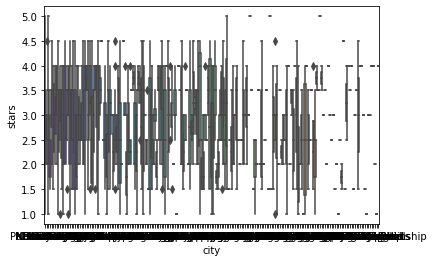

In [16]:
sns.boxplot(x='city',y='stars',data=business_loc,palette='rainbow')

# Restaurant attributes and stars
## drlivery, noise, Wifi, kids, take-out, parking, TV 

In [17]:
b_att = business_atr[['stars','attributes']]

In [18]:
def get_Delivery(att):
    try:
        dic = eval(att)
        try:
            D = dic['RestaurantsDelivery']
            if D=='False':
                return 'no'
            else:
                return 'yes'
        except:
            return('uk')
    except:
        return('uk')

In [19]:
def get_Noise(att):
    try:
        dic = eval(att)
        try:
            D = dic['NoiseLevel']
            if 'loud' in D:
                return 'loud'
            elif 'average' in D:
                return 'average'
            elif 'quiet' in D:
                return 'quiet'
            else:
                return 'uk'
        except:
            return('uk')
    except:
        return('uk')

In [20]:
def get_Wifi(att):
    try:
        dic = eval(att)
        try:
            D = dic['WiFi']
            if 'no' in D:
                return 'no'
            elif 'free' in D:
                return 'free'
            else:
                return 'uk'
        except:
            return('uk')
    except:
        return('uk')

In [21]:
def get_TakeOut(att):
    try:
        dic = eval(att)
        try:
            D = dic['RestaurantsTakeOut']
            if D=='False':
                return 'no'
            else:
                return 'yes'
        except:
            return('uk')
    except:
        return('uk')

In [22]:
def get_TV(att):
    try:
        dic = eval(att)
        try:
            D = dic['HasTV']
            if D=='False':
                return 'no'
            else:
                return 'yes'
        except:
            return('uk')
    except:
        return('uk')

In [23]:
def get_Kids(att):
    try:
        dic = eval(att)
        try:
            D = dic['GoodForKids']
            if D=='False':
                return 'no'
            else:
                return 'yes'
        except:
            return('uk')
    except:
        return('uk')

In [24]:
def get_Parking(att):
    try:
        dic = eval(att)
        try:
            D = np.sum(np.array(list(eval(dic['BusinessParking']).values())))
            return D
        except:
            return -1
    except:
        return -1

In [25]:
warnings.filterwarnings('ignore')
b_att['Delivery'] = b_att.attributes.apply(get_Delivery)
b_att['Noise'] = b_att.attributes.apply(get_Noise)
b_att['Wifi'] = b_att.attributes.apply(get_Wifi)
b_att['Kids'] = b_att.attributes.apply(get_Kids)
b_att['TakeOut'] = b_att.attributes.apply(get_TakeOut)
b_att['Parking'] = b_att.attributes.apply(get_Parking)
b_att['TV'] = b_att.attributes.apply(get_TV)

In [26]:
b_att

,stars,attributes,Delivery,Noise,Wifi,Kids,TakeOut,Parking,TV
0,3.5,"{'RestaurantsDelivery': 'False', 'BusinessAcce...",no,average,uk,yes,yes,1,uk
1,2.5,"{'Ambience': ""{'romantic': False, 'intimate': ...",yes,loud,free,yes,yes,-1,yes
2,2.0,"{'RestaurantsPriceRange2': '1', 'BikeParking':...",no,uk,free,yes,yes,1,yes
3,2.0,"{'RestaurantsGoodForGroups': 'True', 'Business...",yes,uk,uk,yes,yes,0,yes
4,3.5,"{'Alcohol': ""u'none'"", 'OutdoorSeating': 'Fals...",no,average,free,yes,yes,1,no
...,...,...,...,...,...,...,...,...,...
1138,4.0,"{'GoodForKids': 'True', 'RestaurantsReservatio...",no,average,no,yes,yes,0,yes
1139,2.0,"{'OutdoorSeating': 'False', 'Ambience': ""{'rom...",yes,average,free,yes,yes,0,yes
1140,3.0,"{'OutdoorSeating': 'False', 'Ambience': ""{'rom...",yes,average,no,no,yes,-1,yes
1141,2.0,"{'RestaurantsPriceRange2': '1', 'RestaurantsGo...",yes,uk,uk,yes,yes,-1,yes


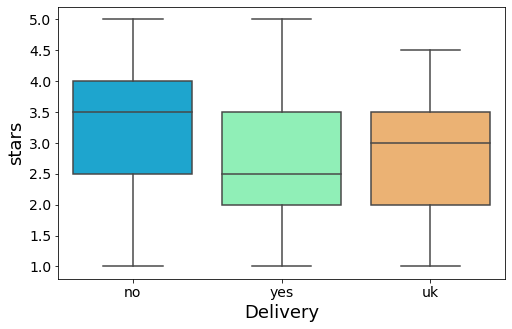

In [27]:
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Counts', fontsize=18)
sns.boxplot(x='Delivery',y='stars',data=b_att,palette='rainbow')

In [28]:
from scipy.stats import ttest_ind

ttest_ind(b_att[b_att.Delivery=='yes'].stars.values,b_att[b_att.Delivery=='no'].stars.values)

Ttest_indResult(statistic=-5.801801880507906, pvalue=8.715049651517012e-09)

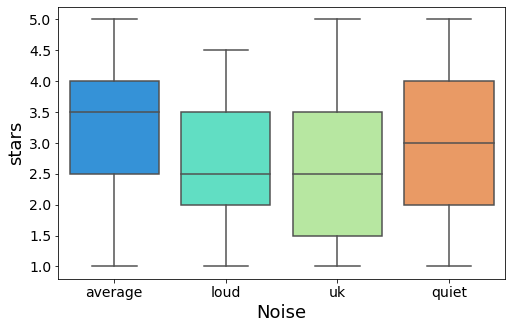

In [29]:
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Counts', fontsize=18)
sns.boxplot(x='Noise',y='stars',data=b_att,palette='rainbow')

In [30]:
ttest_ind(b_att[b_att.Noise=='loud'].stars.values,b_att[b_att.Noise=='average'].stars.values)

Ttest_indResult(statistic=-5.255017796144385, pvalue=2.0141133716517336e-07)

In [31]:
ttest_ind(b_att[b_att.Noise=='average'].stars.values,b_att[b_att.Noise=='quiet'].stars.values)

Ttest_indResult(statistic=1.5434615656535033, pvalue=0.12324782271971177)

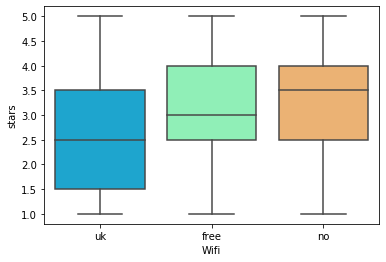

In [32]:
sns.boxplot(x='Wifi',y='stars',data=b_att,palette='rainbow')

In [33]:
#多少有点离谱
ttest_ind(b_att[b_att.Wifi=='free'].stars.values,b_att[b_att.Wifi=='no'].stars.values)

Ttest_indResult(statistic=-2.4646076695563726, pvalue=0.013943396000391697)

Text(0.5, 1.0, 'suitable for kids?')

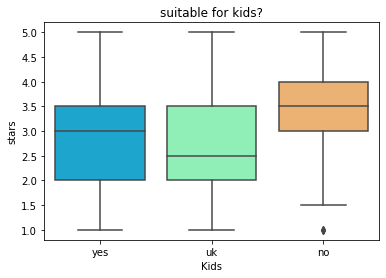

In [34]:
sns.boxplot(x='Kids',y='stars',data=b_att,palette='rainbow').set_title('suitable for kids?')

In [35]:
ttest_ind(b_att[b_att.Kids=='yes'].stars.values,b_att[b_att.Kids=='no'].stars.values)

Ttest_indResult(statistic=-4.860467030495434, pvalue=1.3680319181260366e-06)

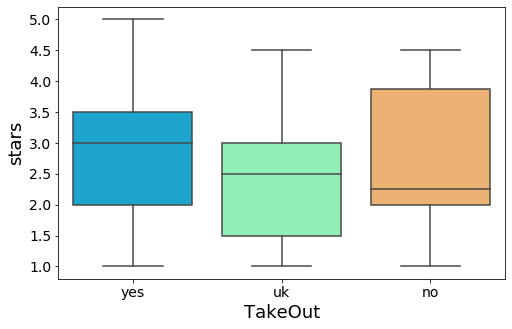

In [36]:
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Counts', fontsize=18)
sns.boxplot(x='TakeOut',y='stars',data=b_att,palette='rainbow')

In [37]:
ttest_ind(b_att[b_att.TakeOut=='yes'].stars.values,b_att[b_att.TakeOut=='no'].stars.values)

Ttest_indResult(statistic=1.2228695345392708, pvalue=0.22166622736718403)

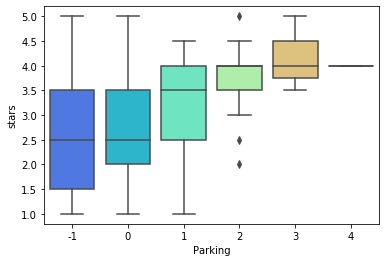

In [38]:
sns.boxplot(x='Parking',y='stars',data=b_att,palette='rainbow')

In [39]:
ttest_ind(b_att[b_att.Parking==1].stars.values,b_att[b_att.Parking==-1].stars.values) 

Ttest_indResult(statistic=9.209960174784097, pvalue=3.490715659422574e-19)

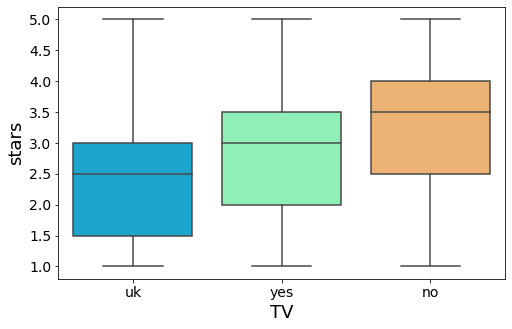

In [42]:
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('TV', fontsize=18)
plt.ylabel('Stars', fontsize=18)
sns.boxplot(x='TV',y='stars',data=b_att,palette='rainbow')

In [41]:
ttest_ind(b_att[b_att.TV=='yes'].stars.values,b_att[b_att.TV=='no'].stars.values) 

Ttest_indResult(statistic=-4.453511832296502, pvalue=9.504574614869608e-06)